# Logistic Regression

## 1. Definition

- Regression analysis (Predictive analysis)
- The dependent variable is dichotomous (binary). 
- Target is categorical

<img src="images/img1.png">

## 2.  Notations

### Sizes:

- m : number of examples in the dataset
- $n_x$ : input size
- $n_y$ : output size (or number of classes)

### Objects:

- $X \in R^{n_x × m}$ is the input matrix
- $x^{(i)} \in R^{n_x}$ is the $i^{th}$ example represented as a column vector
- $x^{(i)}_j$ is the $j^{th}$ feature value of the $i^{th}$ traing example 
- $Y \in R^{n_y × m}$ is the label matrix
- $y^{(i)} \in R^{n_y}$ is the output label for the $i^{th}$ example
- $w \in R^{1 × n_x}$ is the weight
- $b \in R$ is the bias

## 3. Model fitting
https://en.wikipedia.org/wiki/Logistic_regression
### Hypothesis
The goal is to model the probability of a random variable $Y$ being 0 or 1 given experimental data

$z = w^Tx + b$

$\hat{y} = g(z)$

Where g() is a **sigmoid function**.

$g(z) = \frac{1}{1 + e^{-z}}$

<img src="images/sigmod.svg">

$\huge h_{w,b}(x) = \hat{y} = \frac{1}{1 + e^{-(w^Tx + b)}}$

Predict y = 0 if $\hat{y} < 0.5$, in other words $w^Tx + b < 0$

Predict y = 1 if $\hat{y} \geq 0.5$, in other words $w^Tx + b \geq 0$

The goal is to model the probability of a random variable $Y$ being 0 or 1 given experimental data.

$h_{w,b}(X) = Pr(Y = 1 | X; w; b)$

$1 - h_{w,b}(X) = Pr(Y = 0| X; w; b)$

If we attempt to model the probability that $Y$ is 0 or 1 with the function 
$\Pr(Y = y\mid X; w; b)=h_{w, b}(X)^{y}(1-h_{w, b}(X))^{(1-y)}$, we take our likelihood function assuming that all the observations in the sample are independently Bernoulli distributed.
${\begin{aligned}L(w,b \mid x)&=\Pr(Y\mid X; w; b )\\&=\prod _{i}^m \Pr(y^{(i)}\mid x^{(i)}; w; b )\\&=\prod _{i}^m h_{w, b }(x^{(i)})^{y^{(i)}}(1-h_{w, b}(x^{(i)}))^{(1-y^{(i)})}\end{aligned}}$

Typically, the log likelihood is maximized with a normalizing factor $m^{-1}$

$ m^{-1}\log L(w, b \mid x)=m^{-1}\sum _{i=1}^{m}\log \Pr( Y = y^{(i)}\mid x^{(i)}; w; b )$

Let $J(w, b)$ is cost function.

$\begin{aligned}J(w, b) &= - m^{-1} \log L(w, b \mid x) \\
                        &= - m^{-1}\sum _{i=1}^{m}\log \Pr( Y = y^{(i)}\mid x^{(i)}; w; b )\\
                        &= \frac{-1}{m} \sum^{m}_{i=1}{\left (y^{(i)}\log{h_{w,b}(x^{(i)})} + (1-y^{(i)})\log{(1 - h_{w,b}(x^{(i)})}\right )}\\
\end{aligned}$

which is minimized using optimization techniques such as gradient descent.

### Cost function

$ \large J(w,b) = \frac{-1}{m} \sum^{m}_{i=1}{\left (y^{(i)}\log{h_{w,b}(x^{(i)})} + (1-y^{(i)})\log{(1 - h_{w,b}(x^{(i)})}\right )} 
$

### Batch Gradient Descent
https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/logistic_regression/README.md

Gradient descent is an iterative optimization algorithm for finding the minimum of a cost function described above. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Picture below illustrates the steps we take going down of the hill to find local minimum.

<img src="images/gd1.png">

The direction of the step is defined by derivative of the cost function in current point.

<img src="images/gd2.png">

Once we decided what direction we need to go we need to decide what the size of the step we need to take.

<img src="images/gd3.png">


**We need to simultaneously update $w, b$:**

$ w := w - \alpha \frac{\partial{J}}{\partial{w}}$

$ b := b - \alpha \frac{\partial{J}}{\partial{b}}$


**Find $\frac{\partial{J}}{\partial{w}}$, $\frac{\partial{J}}{\partial{b}}$:**


Let: $z^{(i)} = w^Tx^{(i)} + b$ with $z^(i) \in R$

Let: $a^{(i)} = h_{w,b}(x^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$ with $a^{(i)} \in R$

$J(w, b) = \frac{-1}{m} \sum^{m}_{i=1}{\left (y^{(i)}\log{a^{(i)}} + (1-y^{(i)})\log{(1 - a^{(i)})}\right )} $ with $J \in R$

$\frac{\partial{J}}{\partial{z^{(i)}}} = \frac{\partial{J}}{\partial{a^{(i)}}} \frac{\partial{a^{(i)}}}{\partial{z^{(i)}}}$

$\frac{\partial{J}}{\partial{a^{(i)}}} = \frac{-1}{m} \sum_{i=1}^m \left ( \frac{y^{(i)}}{a^{(i)}} -  \frac{1 - y^{(i)}}{1 - a^{(i)}} \right )$

$\frac{\partial{a^{(i)}}}{\partial{z^{(i)}}} = a^{(i)} (1 - a^{(i)})$

$\begin{aligned}
\frac{\partial{J}}{\partial{z^{(i)}}} 
&= \frac{-1}{m} \sum_{i=1}^m (1- a^{(i)})y^{(i)}  - a^{(i)}(1 - y^{(i)}) \\
&= \frac{1}{m} \sum_{i=1}^m a^{(i)} - y^{(i)} 
\end{aligned}
$

$\begin{aligned}
\frac{\partial{J}}{\partial{w}} 
&= \frac{\partial{J}}{\partial{z^{(i)}}} \frac{\partial{z^{(i)}}}{\partial{w}}\\
&= \frac{1}{m} \sum_{i=1}^m ( a^{(i)} - y^{(i)})  x^{(i)}\\
\end{aligned}$

$\begin{aligned}
\frac{\partial{J}}{\partial{b}} 
&= \frac{\partial{J}}{\partial{z^{(i)}}} \frac{\partial{z^{(i)}}}{\partial{b}}\\
&= \frac{1}{m} \sum_{i=1}^m ( a^{(i)} - y^{(i)})\\
\end{aligned}$

Update $w, b$:

$ w := w - \alpha \frac{1}{m} \sum_{i=1}^m ( a^{(i)} - y^{(i)})  x^{(i)}$

$ b := b - \alpha \frac{1}{m} \sum_{i=1}^m ( a^{(i)} - y^{(i)})$

$\alpha$ - the learning rate, the constant that defines the size of the gradient descent step


## 4. Programming

### 4.1 Import modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from lib_logistic import load_dataset, load_extra_datasets

### 4.2 Read data

In [18]:
X, Y = load_dataset('dataset.csv')
m = X.shape[0]
print("Shape of Feature Matrix:", X.shape) 
print("Shape Label Vector:", Y.shape)

Shape of Feature Matrix: (2, 100)
Shape Label Vector: (1, 100)


#### Visualize the given data

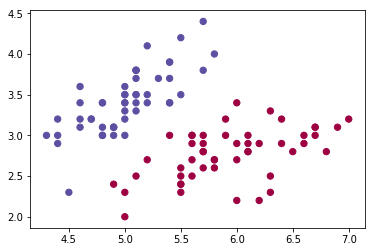

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

In [4]:
n_x, m = X.shape
print('m =', m) 
print('n_x =', n_x)

m = 100
n_x = 2


### 4.3 Building modules

#### 4.3.1 Helper functions

Sigmoid function:

$sigmoid(z) = \frac{1}{1 + e^{-z}}$

In [5]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    return 1 / (1 + np.exp(-z))

#### 4.3.2  Initializing parameters
Initialize w as a vector of zero

In [6]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

def initialize_with_random(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    np.random.seed(2)
    w = np.random.randn(dim,1) * 0.01
    b = 0
    
    return w, b

#### 4.3.3 Forward and Backward propagation
Forward Propagation:
- Get X
- Compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m ( a^{(i)} - y^{(i)})  x^{(i)} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [7]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of size (n_x, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                 # compute activation
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot(1 - Y,np.log(1 - A).T))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1 / m * np.dot(X,(A - Y).T)
    db = 1 / m * np.sum((A - Y).T)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

#### 4.3.4 Optimization

Update the parameters using gradient descent.

In [33]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        if i % 1000 == 0:
            #Plotting
            plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);
            plot_x = X[0,:]
            plot_y = -(X[0,:]*w[0][0] + b)/w[1][0]
            plt.plot(plot_x, plot_y)
            plt.show()
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params, grads, costs

#### 4.3.5 Predict

We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [34]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of size (n_x, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        pass
    
    return Y_prediction

#### 4.3.6 Merge all functions into a model

In [35]:
# GRADED FUNCTION: model

def model(X_train, Y_train, init_zero = True,  num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    w, b = initialize_with_zeros(X_train.shape[0])
    if not init_zero:
        w, b = initialize_with_random(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict
    Y_prediction_train = predict(w, b, X_train)

    # Print train Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### 4.4 Traning data

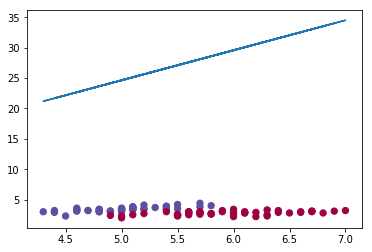

Cost after iteration 0: 0.692346
Cost after iteration 100: 0.631550
Cost after iteration 200: 0.579955
Cost after iteration 300: 0.535776
Cost after iteration 400: 0.497764
Cost after iteration 500: 0.464870
Cost after iteration 600: 0.436230
Cost after iteration 700: 0.411137
Cost after iteration 800: 0.389015
Cost after iteration 900: 0.369397


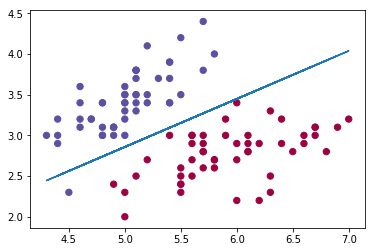

Cost after iteration 1000: 0.351900
Cost after iteration 1100: 0.336211
Cost after iteration 1200: 0.322073
Cost after iteration 1300: 0.309272
Cost after iteration 1400: 0.297633
Cost after iteration 1500: 0.287005
Cost after iteration 1600: 0.277265
Cost after iteration 1700: 0.268306
Cost after iteration 1800: 0.260039
Cost after iteration 1900: 0.252387


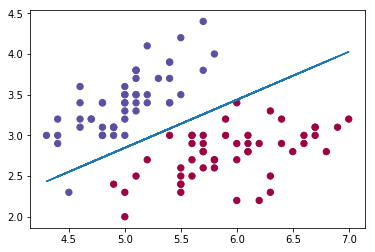

Cost after iteration 2000: 0.245284
Cost after iteration 2100: 0.238673
Cost after iteration 2200: 0.232503
Cost after iteration 2300: 0.226733
Cost after iteration 2400: 0.221324
Cost after iteration 2500: 0.216244
Cost after iteration 2600: 0.211462
Cost after iteration 2700: 0.206953
Cost after iteration 2800: 0.202694
Cost after iteration 2900: 0.198664


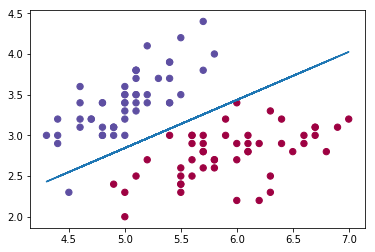

Cost after iteration 3000: 0.194845
Cost after iteration 3100: 0.191221
Cost after iteration 3200: 0.187776
Cost after iteration 3300: 0.184499
Cost after iteration 3400: 0.181375
Cost after iteration 3500: 0.178396
Cost after iteration 3600: 0.175550
Cost after iteration 3700: 0.172829
Cost after iteration 3800: 0.170224
Cost after iteration 3900: 0.167728


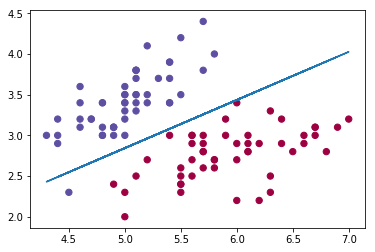

Cost after iteration 4000: 0.165335
Cost after iteration 4100: 0.163037
Cost after iteration 4200: 0.160830
Cost after iteration 4300: 0.158707
Cost after iteration 4400: 0.156664
Cost after iteration 4500: 0.154696
Cost after iteration 4600: 0.152800
Cost after iteration 4700: 0.150970
Cost after iteration 4800: 0.149205
Cost after iteration 4900: 0.147499


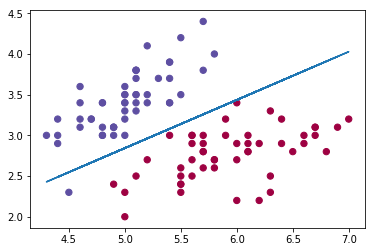

Cost after iteration 5000: 0.145851
Cost after iteration 5100: 0.144257
Cost after iteration 5200: 0.142714
Cost after iteration 5300: 0.141220
Cost after iteration 5400: 0.139773
Cost after iteration 5500: 0.138371
Cost after iteration 5600: 0.137010
Cost after iteration 5700: 0.135690
Cost after iteration 5800: 0.134409
Cost after iteration 5900: 0.133164


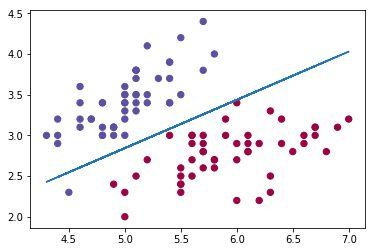

Cost after iteration 6000: 0.131955
Cost after iteration 6100: 0.130779
Cost after iteration 6200: 0.129636
Cost after iteration 6300: 0.128524
Cost after iteration 6400: 0.127441
Cost after iteration 6500: 0.126386
Cost after iteration 6600: 0.125359
Cost after iteration 6700: 0.124358
Cost after iteration 6800: 0.123382
Cost after iteration 6900: 0.122431


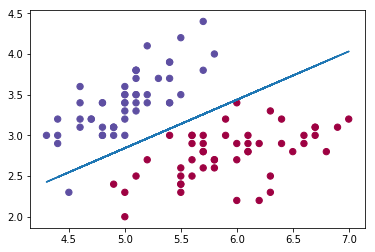

Cost after iteration 7000: 0.121503
Cost after iteration 7100: 0.120597
Cost after iteration 7200: 0.119713
Cost after iteration 7300: 0.118849
Cost after iteration 7400: 0.118006
Cost after iteration 7500: 0.117182
Cost after iteration 7600: 0.116376
Cost after iteration 7700: 0.115589
Cost after iteration 7800: 0.114819
Cost after iteration 7900: 0.114065


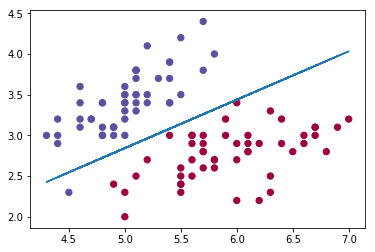

Cost after iteration 8000: 0.113328
Cost after iteration 8100: 0.112607
Cost after iteration 8200: 0.111901
Cost after iteration 8300: 0.111209
Cost after iteration 8400: 0.110532
Cost after iteration 8500: 0.109868
Cost after iteration 8600: 0.109218
Cost after iteration 8700: 0.108581
Cost after iteration 8800: 0.107956
Cost after iteration 8900: 0.107344


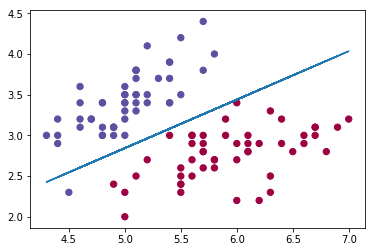

Cost after iteration 9000: 0.106743
Cost after iteration 9100: 0.106154
Cost after iteration 9200: 0.105575
Cost after iteration 9300: 0.105008
Cost after iteration 9400: 0.104451
Cost after iteration 9500: 0.103904
Cost after iteration 9600: 0.103367
Cost after iteration 9700: 0.102840
Cost after iteration 9800: 0.102322
Cost after iteration 9900: 0.101813


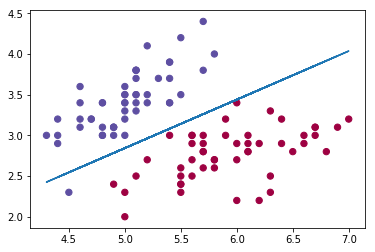

Cost after iteration 10000: 0.101313
Cost after iteration 10100: 0.100821
Cost after iteration 10200: 0.100338
Cost after iteration 10300: 0.099863
Cost after iteration 10400: 0.099396
Cost after iteration 10500: 0.098937
Cost after iteration 10600: 0.098485
Cost after iteration 10700: 0.098041
Cost after iteration 10800: 0.097604
Cost after iteration 10900: 0.097174


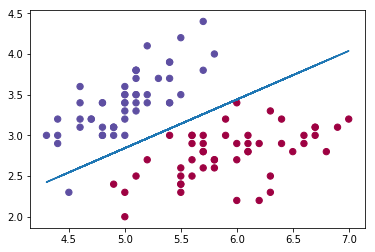

Cost after iteration 11000: 0.096750
Cost after iteration 11100: 0.096333
Cost after iteration 11200: 0.095923
Cost after iteration 11300: 0.095519
Cost after iteration 11400: 0.095121
Cost after iteration 11500: 0.094730
Cost after iteration 11600: 0.094344
Cost after iteration 11700: 0.093964
Cost after iteration 11800: 0.093589
Cost after iteration 11900: 0.093220


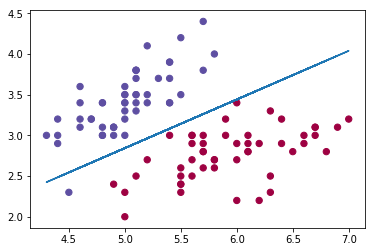

Cost after iteration 12000: 0.092856
Cost after iteration 12100: 0.092498
Cost after iteration 12200: 0.092145
Cost after iteration 12300: 0.091796
Cost after iteration 12400: 0.091453
Cost after iteration 12500: 0.091114
Cost after iteration 12600: 0.090781
Cost after iteration 12700: 0.090451
Cost after iteration 12800: 0.090126
Cost after iteration 12900: 0.089806


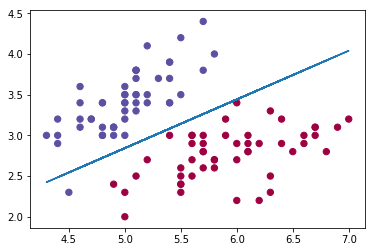

Cost after iteration 13000: 0.089490
Cost after iteration 13100: 0.089178
Cost after iteration 13200: 0.088870
Cost after iteration 13300: 0.088567
Cost after iteration 13400: 0.088267
Cost after iteration 13500: 0.087971
Cost after iteration 13600: 0.087679
Cost after iteration 13700: 0.087391
Cost after iteration 13800: 0.087106
Cost after iteration 13900: 0.086825


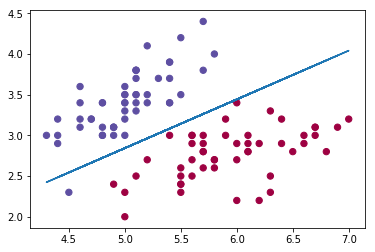

Cost after iteration 14000: 0.086547
Cost after iteration 14100: 0.086273
Cost after iteration 14200: 0.086002
Cost after iteration 14300: 0.085735
Cost after iteration 14400: 0.085471
Cost after iteration 14500: 0.085210
Cost after iteration 14600: 0.084952
Cost after iteration 14700: 0.084697
Cost after iteration 14800: 0.084445
Cost after iteration 14900: 0.084196


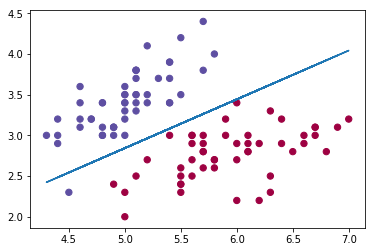

Cost after iteration 15000: 0.083950
Cost after iteration 15100: 0.083707
Cost after iteration 15200: 0.083467
Cost after iteration 15300: 0.083229
Cost after iteration 15400: 0.082994
Cost after iteration 15500: 0.082762
Cost after iteration 15600: 0.082533
Cost after iteration 15700: 0.082306
Cost after iteration 15800: 0.082081
Cost after iteration 15900: 0.081859


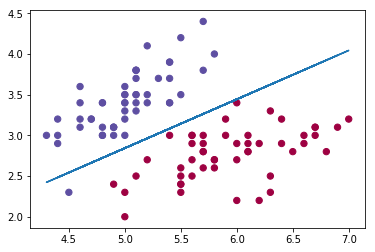

Cost after iteration 16000: 0.081639
Cost after iteration 16100: 0.081422
Cost after iteration 16200: 0.081207
Cost after iteration 16300: 0.080995
Cost after iteration 16400: 0.080784
Cost after iteration 16500: 0.080576
Cost after iteration 16600: 0.080370
Cost after iteration 16700: 0.080167
Cost after iteration 16800: 0.079965
Cost after iteration 16900: 0.079766


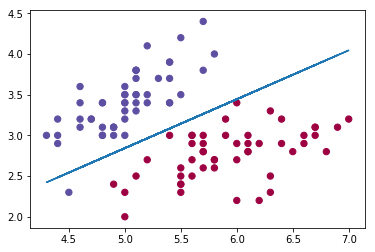

Cost after iteration 17000: 0.079568
Cost after iteration 17100: 0.079373
Cost after iteration 17200: 0.079179
Cost after iteration 17300: 0.078988
Cost after iteration 17400: 0.078798
Cost after iteration 17500: 0.078611
Cost after iteration 17600: 0.078425
Cost after iteration 17700: 0.078241
Cost after iteration 17800: 0.078059
Cost after iteration 17900: 0.077878


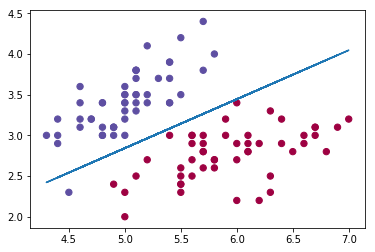

Cost after iteration 18000: 0.077700
Cost after iteration 18100: 0.077523
Cost after iteration 18200: 0.077348
Cost after iteration 18300: 0.077174
Cost after iteration 18400: 0.077002
Cost after iteration 18500: 0.076832
Cost after iteration 18600: 0.076663
Cost after iteration 18700: 0.076496
Cost after iteration 18800: 0.076331
Cost after iteration 18900: 0.076167


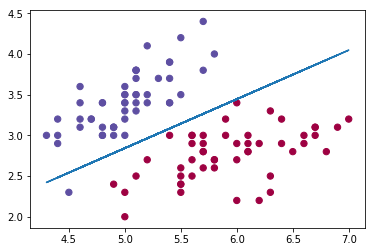

Cost after iteration 19000: 0.076004
Cost after iteration 19100: 0.075843
Cost after iteration 19200: 0.075684
Cost after iteration 19300: 0.075526
Cost after iteration 19400: 0.075369
Cost after iteration 19500: 0.075214
Cost after iteration 19600: 0.075060
Cost after iteration 19700: 0.074908
Cost after iteration 19800: 0.074757
Cost after iteration 19900: 0.074607


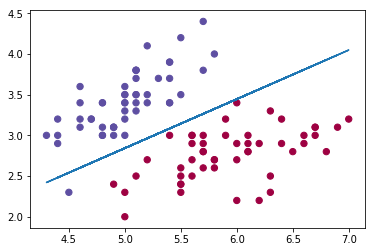

Cost after iteration 20000: 0.074458
Cost after iteration 20100: 0.074311
Cost after iteration 20200: 0.074165
Cost after iteration 20300: 0.074020
Cost after iteration 20400: 0.073877
Cost after iteration 20500: 0.073735
Cost after iteration 20600: 0.073594
Cost after iteration 20700: 0.073454
Cost after iteration 20800: 0.073315
Cost after iteration 20900: 0.073178


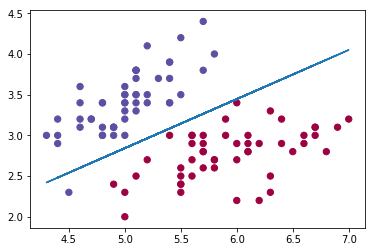

Cost after iteration 21000: 0.073042
Cost after iteration 21100: 0.072907
Cost after iteration 21200: 0.072772
Cost after iteration 21300: 0.072639
Cost after iteration 21400: 0.072508
Cost after iteration 21500: 0.072377
Cost after iteration 21600: 0.072247
Cost after iteration 21700: 0.072118
Cost after iteration 21800: 0.071991
Cost after iteration 21900: 0.071864


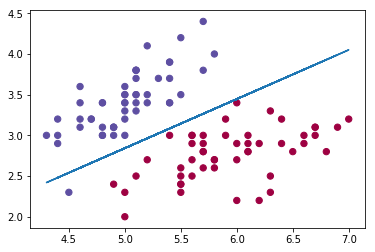

Cost after iteration 22000: 0.071738
Cost after iteration 22100: 0.071614
Cost after iteration 22200: 0.071490
Cost after iteration 22300: 0.071367
Cost after iteration 22400: 0.071246
Cost after iteration 22500: 0.071125
Cost after iteration 22600: 0.071005
Cost after iteration 22700: 0.070886
Cost after iteration 22800: 0.070768
Cost after iteration 22900: 0.070651


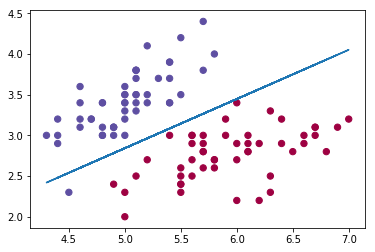

Cost after iteration 23000: 0.070534
Cost after iteration 23100: 0.070419
Cost after iteration 23200: 0.070305
Cost after iteration 23300: 0.070191
Cost after iteration 23400: 0.070078
Cost after iteration 23500: 0.069966
Cost after iteration 23600: 0.069855
Cost after iteration 23700: 0.069745
Cost after iteration 23800: 0.069635
Cost after iteration 23900: 0.069527


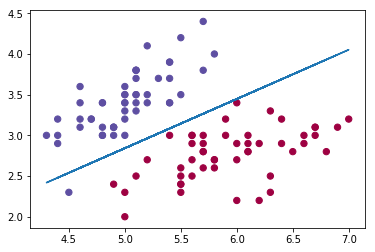

Cost after iteration 24000: 0.069419
Cost after iteration 24100: 0.069312
Cost after iteration 24200: 0.069205
Cost after iteration 24300: 0.069100
Cost after iteration 24400: 0.068995
Cost after iteration 24500: 0.068891
Cost after iteration 24600: 0.068787
Cost after iteration 24700: 0.068685
Cost after iteration 24800: 0.068583
Cost after iteration 24900: 0.068481


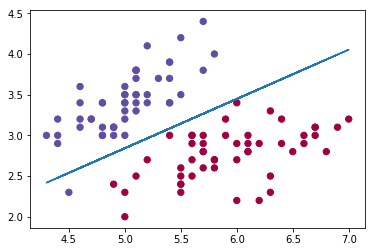

Cost after iteration 25000: 0.068381
Cost after iteration 25100: 0.068281
Cost after iteration 25200: 0.068182
Cost after iteration 25300: 0.068084
Cost after iteration 25400: 0.067986
Cost after iteration 25500: 0.067889
Cost after iteration 25600: 0.067792
Cost after iteration 25700: 0.067697
Cost after iteration 25800: 0.067602
Cost after iteration 25900: 0.067507


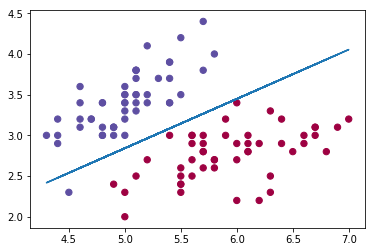

Cost after iteration 26000: 0.067413
Cost after iteration 26100: 0.067320
Cost after iteration 26200: 0.067227
Cost after iteration 26300: 0.067135
Cost after iteration 26400: 0.067044
Cost after iteration 26500: 0.066953
Cost after iteration 26600: 0.066863
Cost after iteration 26700: 0.066773
Cost after iteration 26800: 0.066684
Cost after iteration 26900: 0.066596


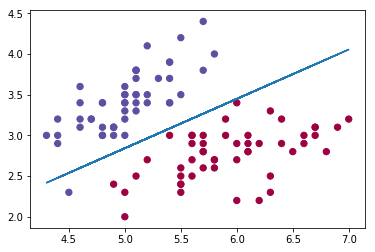

Cost after iteration 27000: 0.066508
Cost after iteration 27100: 0.066421
Cost after iteration 27200: 0.066334
Cost after iteration 27300: 0.066248
Cost after iteration 27400: 0.066162
Cost after iteration 27500: 0.066077
Cost after iteration 27600: 0.065992
Cost after iteration 27700: 0.065908
Cost after iteration 27800: 0.065825
Cost after iteration 27900: 0.065742


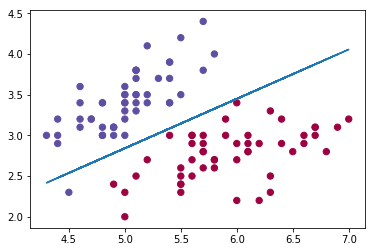

Cost after iteration 28000: 0.065659
Cost after iteration 28100: 0.065577
Cost after iteration 28200: 0.065496
Cost after iteration 28300: 0.065415
Cost after iteration 28400: 0.065334
Cost after iteration 28500: 0.065254
Cost after iteration 28600: 0.065175
Cost after iteration 28700: 0.065096
Cost after iteration 28800: 0.065017
Cost after iteration 28900: 0.064939


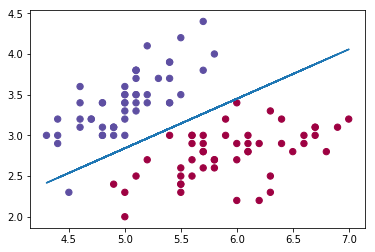

Cost after iteration 29000: 0.064861
Cost after iteration 29100: 0.064784
Cost after iteration 29200: 0.064708
Cost after iteration 29300: 0.064631
Cost after iteration 29400: 0.064556
Cost after iteration 29500: 0.064480
Cost after iteration 29600: 0.064405
Cost after iteration 29700: 0.064331
Cost after iteration 29800: 0.064257
Cost after iteration 29900: 0.064183


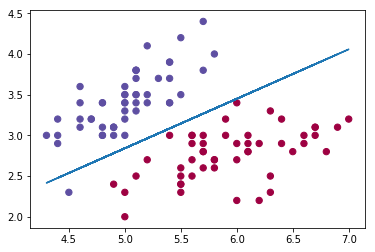

Cost after iteration 30000: 0.064110
Cost after iteration 30100: 0.064037
Cost after iteration 30200: 0.063965
Cost after iteration 30300: 0.063893
Cost after iteration 30400: 0.063821
Cost after iteration 30500: 0.063750
Cost after iteration 30600: 0.063679
Cost after iteration 30700: 0.063609
Cost after iteration 30800: 0.063539
Cost after iteration 30900: 0.063470


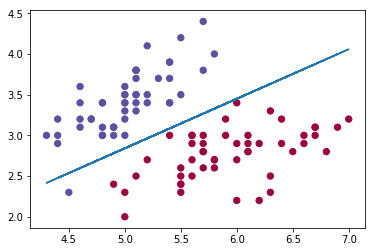

Cost after iteration 31000: 0.063400
Cost after iteration 31100: 0.063332
Cost after iteration 31200: 0.063263
Cost after iteration 31300: 0.063195
Cost after iteration 31400: 0.063128
Cost after iteration 31500: 0.063060
Cost after iteration 31600: 0.062993
Cost after iteration 31700: 0.062927
Cost after iteration 31800: 0.062861
Cost after iteration 31900: 0.062795


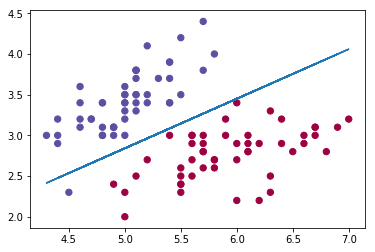

Cost after iteration 32000: 0.062729
Cost after iteration 32100: 0.062664
Cost after iteration 32200: 0.062599
Cost after iteration 32300: 0.062535
Cost after iteration 32400: 0.062471
Cost after iteration 32500: 0.062407
Cost after iteration 32600: 0.062344
Cost after iteration 32700: 0.062281
Cost after iteration 32800: 0.062218
Cost after iteration 32900: 0.062156


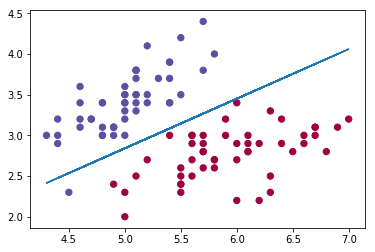

Cost after iteration 33000: 0.062093
Cost after iteration 33100: 0.062032
Cost after iteration 33200: 0.061970
Cost after iteration 33300: 0.061909
Cost after iteration 33400: 0.061848
Cost after iteration 33500: 0.061788
Cost after iteration 33600: 0.061728
Cost after iteration 33700: 0.061668
Cost after iteration 33800: 0.061608
Cost after iteration 33900: 0.061549


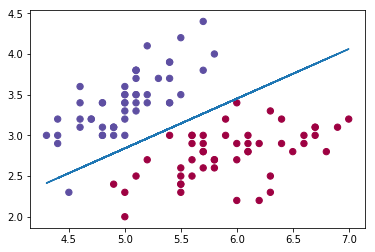

Cost after iteration 34000: 0.061490
Cost after iteration 34100: 0.061431
Cost after iteration 34200: 0.061373
Cost after iteration 34300: 0.061315
Cost after iteration 34400: 0.061257
Cost after iteration 34500: 0.061199
Cost after iteration 34600: 0.061142
Cost after iteration 34700: 0.061085
Cost after iteration 34800: 0.061028
Cost after iteration 34900: 0.060972


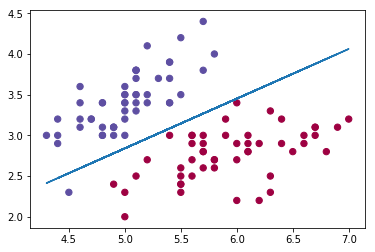

Cost after iteration 35000: 0.060916
Cost after iteration 35100: 0.060860
Cost after iteration 35200: 0.060804
Cost after iteration 35300: 0.060749
Cost after iteration 35400: 0.060694
Cost after iteration 35500: 0.060639
Cost after iteration 35600: 0.060585
Cost after iteration 35700: 0.060530
Cost after iteration 35800: 0.060476
Cost after iteration 35900: 0.060423


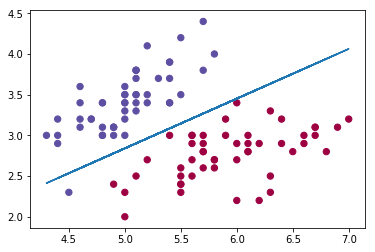

Cost after iteration 36000: 0.060369
Cost after iteration 36100: 0.060316
Cost after iteration 36200: 0.060263
Cost after iteration 36300: 0.060210
Cost after iteration 36400: 0.060158
Cost after iteration 36500: 0.060105
Cost after iteration 36600: 0.060053
Cost after iteration 36700: 0.060002
Cost after iteration 36800: 0.059950
Cost after iteration 36900: 0.059899


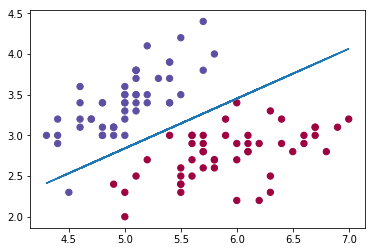

Cost after iteration 37000: 0.059848
Cost after iteration 37100: 0.059797
Cost after iteration 37200: 0.059746
Cost after iteration 37300: 0.059696
Cost after iteration 37400: 0.059646
Cost after iteration 37500: 0.059596
Cost after iteration 37600: 0.059546
Cost after iteration 37700: 0.059497
Cost after iteration 37800: 0.059448
Cost after iteration 37900: 0.059399


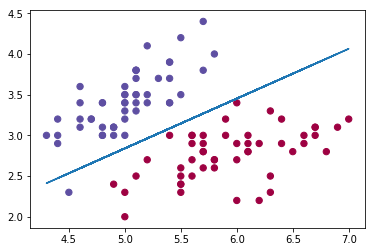

Cost after iteration 38000: 0.059350
Cost after iteration 38100: 0.059301
Cost after iteration 38200: 0.059253
Cost after iteration 38300: 0.059205
Cost after iteration 38400: 0.059157
Cost after iteration 38500: 0.059109
Cost after iteration 38600: 0.059062
Cost after iteration 38700: 0.059014
Cost after iteration 38800: 0.058967
Cost after iteration 38900: 0.058920


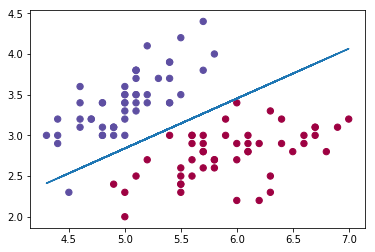

Cost after iteration 39000: 0.058874
Cost after iteration 39100: 0.058827
Cost after iteration 39200: 0.058781
Cost after iteration 39300: 0.058735
Cost after iteration 39400: 0.058689
Cost after iteration 39500: 0.058643
Cost after iteration 39600: 0.058598
Cost after iteration 39700: 0.058552
Cost after iteration 39800: 0.058507
Cost after iteration 39900: 0.058462


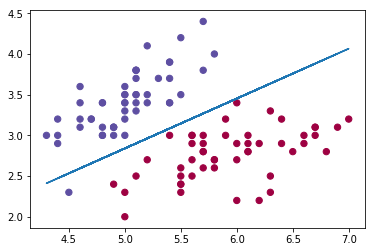

Cost after iteration 40000: 0.058418
Cost after iteration 40100: 0.058373
Cost after iteration 40200: 0.058329
Cost after iteration 40300: 0.058285
Cost after iteration 40400: 0.058241
Cost after iteration 40500: 0.058197
Cost after iteration 40600: 0.058153
Cost after iteration 40700: 0.058110
Cost after iteration 40800: 0.058066
Cost after iteration 40900: 0.058023


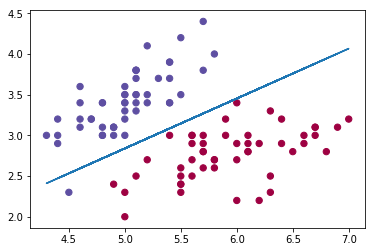

Cost after iteration 41000: 0.057980
Cost after iteration 41100: 0.057938
Cost after iteration 41200: 0.057895
Cost after iteration 41300: 0.057853
Cost after iteration 41400: 0.057811
Cost after iteration 41500: 0.057769
Cost after iteration 41600: 0.057727
Cost after iteration 41700: 0.057685
Cost after iteration 41800: 0.057643
Cost after iteration 41900: 0.057602


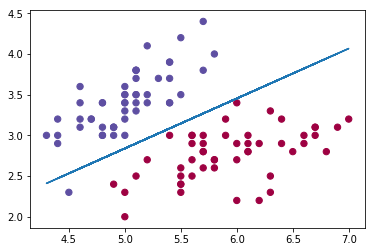

Cost after iteration 42000: 0.057561
Cost after iteration 42100: 0.057520
Cost after iteration 42200: 0.057479
Cost after iteration 42300: 0.057438
Cost after iteration 42400: 0.057398
Cost after iteration 42500: 0.057357
Cost after iteration 42600: 0.057317
Cost after iteration 42700: 0.057277
Cost after iteration 42800: 0.057237
Cost after iteration 42900: 0.057197


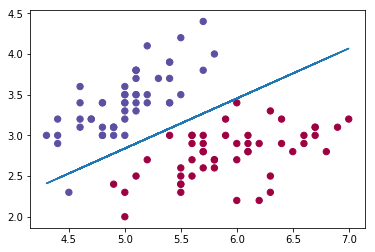

Cost after iteration 43000: 0.057158
Cost after iteration 43100: 0.057118
Cost after iteration 43200: 0.057079
Cost after iteration 43300: 0.057040
Cost after iteration 43400: 0.057001
Cost after iteration 43500: 0.056962
Cost after iteration 43600: 0.056923
Cost after iteration 43700: 0.056885
Cost after iteration 43800: 0.056846
Cost after iteration 43900: 0.056808


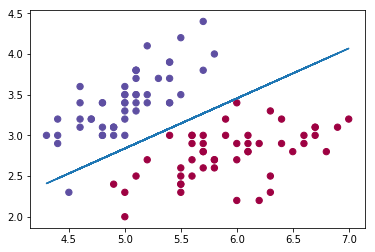

Cost after iteration 44000: 0.056770
Cost after iteration 44100: 0.056732
Cost after iteration 44200: 0.056694
Cost after iteration 44300: 0.056656
Cost after iteration 44400: 0.056619
Cost after iteration 44500: 0.056581
Cost after iteration 44600: 0.056544
Cost after iteration 44700: 0.056507
Cost after iteration 44800: 0.056470
Cost after iteration 44900: 0.056433


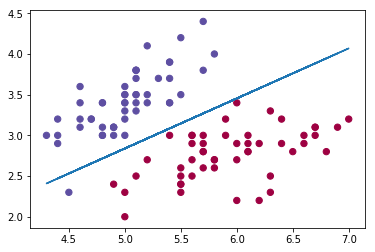

Cost after iteration 45000: 0.056396
Cost after iteration 45100: 0.056360
Cost after iteration 45200: 0.056323
Cost after iteration 45300: 0.056287
Cost after iteration 45400: 0.056251
Cost after iteration 45500: 0.056215
Cost after iteration 45600: 0.056179
Cost after iteration 45700: 0.056143
Cost after iteration 45800: 0.056107
Cost after iteration 45900: 0.056072


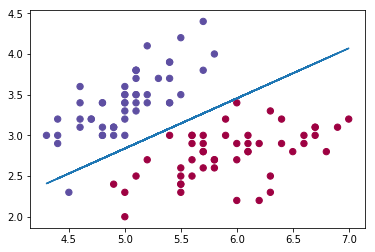

Cost after iteration 46000: 0.056036
Cost after iteration 46100: 0.056001
Cost after iteration 46200: 0.055966
Cost after iteration 46300: 0.055931
Cost after iteration 46400: 0.055896
Cost after iteration 46500: 0.055861
Cost after iteration 46600: 0.055827
Cost after iteration 46700: 0.055792
Cost after iteration 46800: 0.055758
Cost after iteration 46900: 0.055723


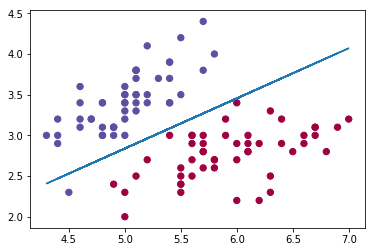

Cost after iteration 47000: 0.055689
Cost after iteration 47100: 0.055655
Cost after iteration 47200: 0.055621
Cost after iteration 47300: 0.055587
Cost after iteration 47400: 0.055554
Cost after iteration 47500: 0.055520
Cost after iteration 47600: 0.055487
Cost after iteration 47700: 0.055453
Cost after iteration 47800: 0.055420
Cost after iteration 47900: 0.055387


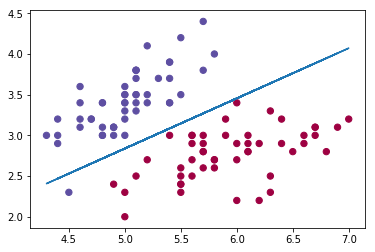

Cost after iteration 48000: 0.055354
Cost after iteration 48100: 0.055321
Cost after iteration 48200: 0.055288
Cost after iteration 48300: 0.055256
Cost after iteration 48400: 0.055223
Cost after iteration 48500: 0.055191
Cost after iteration 48600: 0.055158
Cost after iteration 48700: 0.055126
Cost after iteration 48800: 0.055094
Cost after iteration 48900: 0.055062


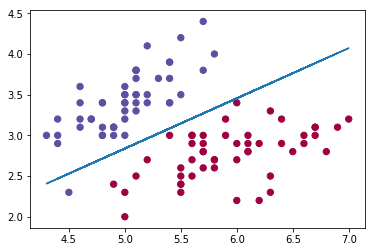

Cost after iteration 49000: 0.055030
Cost after iteration 49100: 0.054998
Cost after iteration 49200: 0.054966
Cost after iteration 49300: 0.054935
Cost after iteration 49400: 0.054903
Cost after iteration 49500: 0.054872
Cost after iteration 49600: 0.054841
Cost after iteration 49700: 0.054809
Cost after iteration 49800: 0.054778
Cost after iteration 49900: 0.054747


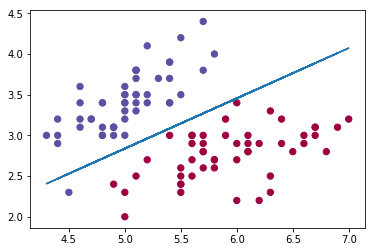

Cost after iteration 50000: 0.054717
Cost after iteration 50100: 0.054686
Cost after iteration 50200: 0.054655
Cost after iteration 50300: 0.054624
Cost after iteration 50400: 0.054594
Cost after iteration 50500: 0.054564
Cost after iteration 50600: 0.054533
Cost after iteration 50700: 0.054503
Cost after iteration 50800: 0.054473
Cost after iteration 50900: 0.054443


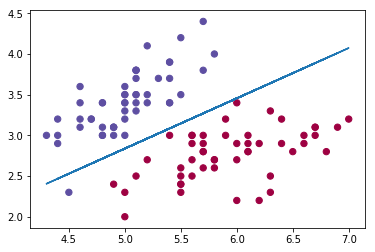

Cost after iteration 51000: 0.054413
Cost after iteration 51100: 0.054383
Cost after iteration 51200: 0.054354
Cost after iteration 51300: 0.054324
Cost after iteration 51400: 0.054295
Cost after iteration 51500: 0.054265
Cost after iteration 51600: 0.054236
Cost after iteration 51700: 0.054207
Cost after iteration 51800: 0.054177
Cost after iteration 51900: 0.054148


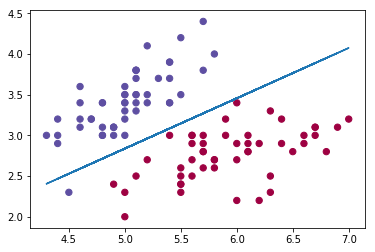

Cost after iteration 52000: 0.054119
Cost after iteration 52100: 0.054090
Cost after iteration 52200: 0.054062
Cost after iteration 52300: 0.054033
Cost after iteration 52400: 0.054004
Cost after iteration 52500: 0.053976
Cost after iteration 52600: 0.053947
Cost after iteration 52700: 0.053919
Cost after iteration 52800: 0.053891
Cost after iteration 52900: 0.053863


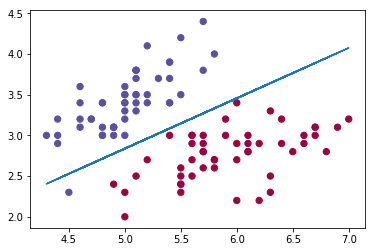

Cost after iteration 53000: 0.053834
Cost after iteration 53100: 0.053806
Cost after iteration 53200: 0.053779
Cost after iteration 53300: 0.053751
Cost after iteration 53400: 0.053723
Cost after iteration 53500: 0.053695
Cost after iteration 53600: 0.053668
Cost after iteration 53700: 0.053640
Cost after iteration 53800: 0.053613
Cost after iteration 53900: 0.053585


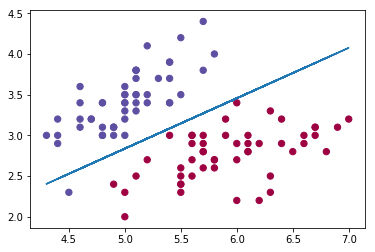

Cost after iteration 54000: 0.053558
Cost after iteration 54100: 0.053531
Cost after iteration 54200: 0.053504
Cost after iteration 54300: 0.053477
Cost after iteration 54400: 0.053450
Cost after iteration 54500: 0.053423
Cost after iteration 54600: 0.053396
Cost after iteration 54700: 0.053370
Cost after iteration 54800: 0.053343
Cost after iteration 54900: 0.053316


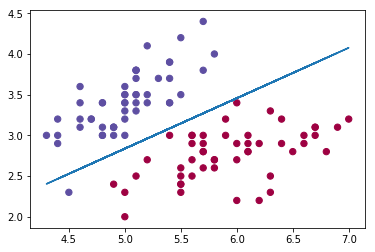

Cost after iteration 55000: 0.053290
Cost after iteration 55100: 0.053263
Cost after iteration 55200: 0.053237
Cost after iteration 55300: 0.053211
Cost after iteration 55400: 0.053185
Cost after iteration 55500: 0.053159
Cost after iteration 55600: 0.053133
Cost after iteration 55700: 0.053107
Cost after iteration 55800: 0.053081
Cost after iteration 55900: 0.053055


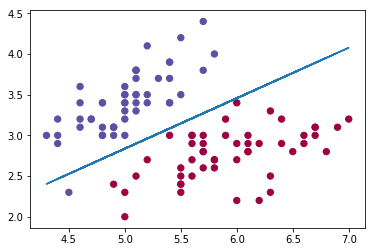

Cost after iteration 56000: 0.053029
Cost after iteration 56100: 0.053004
Cost after iteration 56200: 0.052978
Cost after iteration 56300: 0.052953
Cost after iteration 56400: 0.052927
Cost after iteration 56500: 0.052902
Cost after iteration 56600: 0.052876
Cost after iteration 56700: 0.052851
Cost after iteration 56800: 0.052826
Cost after iteration 56900: 0.052801


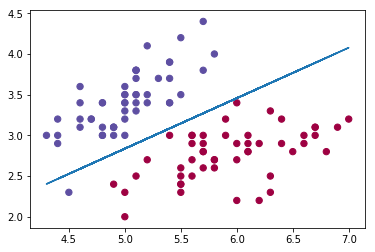

Cost after iteration 57000: 0.052776
Cost after iteration 57100: 0.052751
Cost after iteration 57200: 0.052726
Cost after iteration 57300: 0.052701
Cost after iteration 57400: 0.052677
Cost after iteration 57500: 0.052652
Cost after iteration 57600: 0.052627
Cost after iteration 57700: 0.052603
Cost after iteration 57800: 0.052578
Cost after iteration 57900: 0.052554


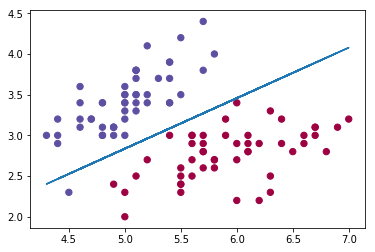

Cost after iteration 58000: 0.052530
Cost after iteration 58100: 0.052505
Cost after iteration 58200: 0.052481
Cost after iteration 58300: 0.052457
Cost after iteration 58400: 0.052433
Cost after iteration 58500: 0.052409
Cost after iteration 58600: 0.052385
Cost after iteration 58700: 0.052361
Cost after iteration 58800: 0.052337
Cost after iteration 58900: 0.052313


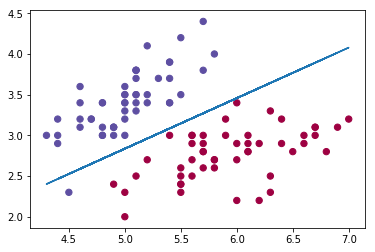

Cost after iteration 59000: 0.052290
Cost after iteration 59100: 0.052266
Cost after iteration 59200: 0.052243
Cost after iteration 59300: 0.052219
Cost after iteration 59400: 0.052196
Cost after iteration 59500: 0.052172
Cost after iteration 59600: 0.052149
Cost after iteration 59700: 0.052126
Cost after iteration 59800: 0.052102
Cost after iteration 59900: 0.052079


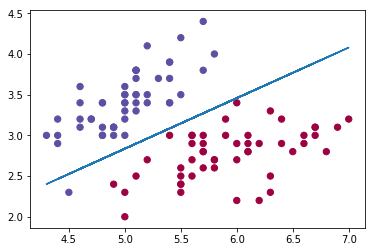

Cost after iteration 60000: 0.052056
Cost after iteration 60100: 0.052033
Cost after iteration 60200: 0.052010
Cost after iteration 60300: 0.051987
Cost after iteration 60400: 0.051964
Cost after iteration 60500: 0.051942
Cost after iteration 60600: 0.051919
Cost after iteration 60700: 0.051896
Cost after iteration 60800: 0.051874
Cost after iteration 60900: 0.051851


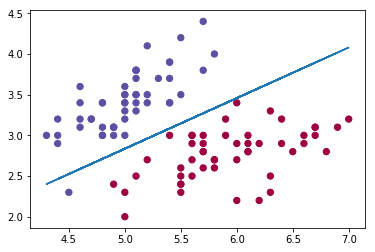

Cost after iteration 61000: 0.051829
Cost after iteration 61100: 0.051806
Cost after iteration 61200: 0.051784
Cost after iteration 61300: 0.051762
Cost after iteration 61400: 0.051739
Cost after iteration 61500: 0.051717
Cost after iteration 61600: 0.051695
Cost after iteration 61700: 0.051673
Cost after iteration 61800: 0.051651
Cost after iteration 61900: 0.051629


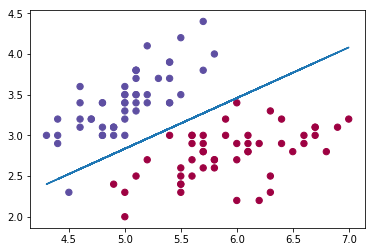

Cost after iteration 62000: 0.051607
Cost after iteration 62100: 0.051585
Cost after iteration 62200: 0.051563
Cost after iteration 62300: 0.051541
Cost after iteration 62400: 0.051520
Cost after iteration 62500: 0.051498
Cost after iteration 62600: 0.051476
Cost after iteration 62700: 0.051455
Cost after iteration 62800: 0.051433
Cost after iteration 62900: 0.051412


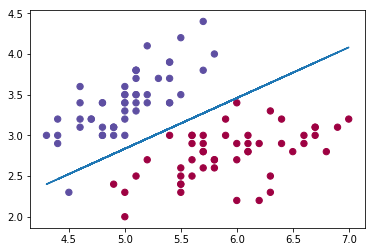

Cost after iteration 63000: 0.051390
Cost after iteration 63100: 0.051369
Cost after iteration 63200: 0.051348
Cost after iteration 63300: 0.051327
Cost after iteration 63400: 0.051305
Cost after iteration 63500: 0.051284
Cost after iteration 63600: 0.051263
Cost after iteration 63700: 0.051242
Cost after iteration 63800: 0.051221
Cost after iteration 63900: 0.051200


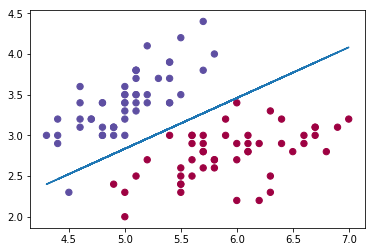

Cost after iteration 64000: 0.051179
Cost after iteration 64100: 0.051158
Cost after iteration 64200: 0.051138
Cost after iteration 64300: 0.051117
Cost after iteration 64400: 0.051096
Cost after iteration 64500: 0.051076
Cost after iteration 64600: 0.051055
Cost after iteration 64700: 0.051034
Cost after iteration 64800: 0.051014
Cost after iteration 64900: 0.050994


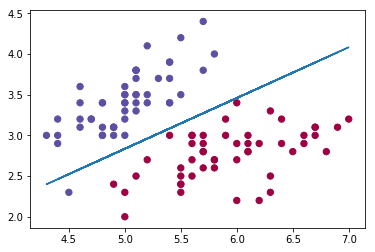

Cost after iteration 65000: 0.050973
Cost after iteration 65100: 0.050953
Cost after iteration 65200: 0.050932
Cost after iteration 65300: 0.050912
Cost after iteration 65400: 0.050892
Cost after iteration 65500: 0.050872
Cost after iteration 65600: 0.050852
Cost after iteration 65700: 0.050832
Cost after iteration 65800: 0.050812
Cost after iteration 65900: 0.050792


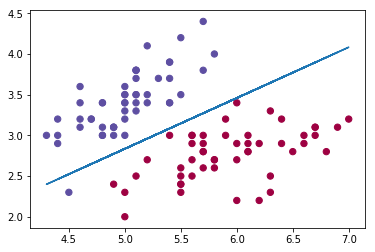

Cost after iteration 66000: 0.050772
Cost after iteration 66100: 0.050752
Cost after iteration 66200: 0.050732
Cost after iteration 66300: 0.050712
Cost after iteration 66400: 0.050692
Cost after iteration 66500: 0.050673
Cost after iteration 66600: 0.050653
Cost after iteration 66700: 0.050633
Cost after iteration 66800: 0.050614
Cost after iteration 66900: 0.050594


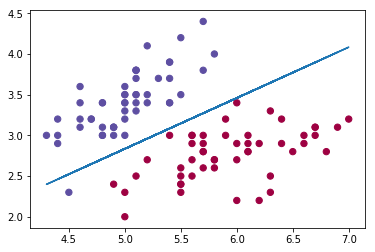

Cost after iteration 67000: 0.050575
Cost after iteration 67100: 0.050555
Cost after iteration 67200: 0.050536
Cost after iteration 67300: 0.050517
Cost after iteration 67400: 0.050497
Cost after iteration 67500: 0.050478
Cost after iteration 67600: 0.050459
Cost after iteration 67700: 0.050440
Cost after iteration 67800: 0.050421
Cost after iteration 67900: 0.050401


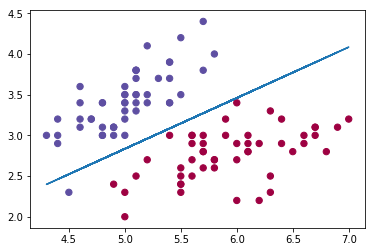

Cost after iteration 68000: 0.050382
Cost after iteration 68100: 0.050363
Cost after iteration 68200: 0.050344
Cost after iteration 68300: 0.050325
Cost after iteration 68400: 0.050307
Cost after iteration 68500: 0.050288
Cost after iteration 68600: 0.050269
Cost after iteration 68700: 0.050250
Cost after iteration 68800: 0.050231
Cost after iteration 68900: 0.050213


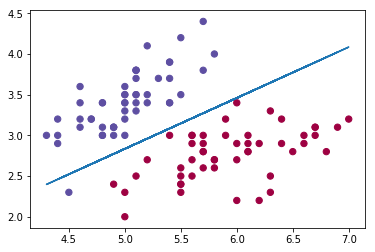

Cost after iteration 69000: 0.050194
Cost after iteration 69100: 0.050176
Cost after iteration 69200: 0.050157
Cost after iteration 69300: 0.050138
Cost after iteration 69400: 0.050120
Cost after iteration 69500: 0.050101
Cost after iteration 69600: 0.050083
Cost after iteration 69700: 0.050065
Cost after iteration 69800: 0.050046
Cost after iteration 69900: 0.050028


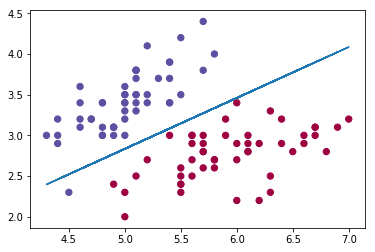

Cost after iteration 70000: 0.050010
Cost after iteration 70100: 0.049992
Cost after iteration 70200: 0.049973
Cost after iteration 70300: 0.049955
Cost after iteration 70400: 0.049937
Cost after iteration 70500: 0.049919
Cost after iteration 70600: 0.049901
Cost after iteration 70700: 0.049883
Cost after iteration 70800: 0.049865
Cost after iteration 70900: 0.049847


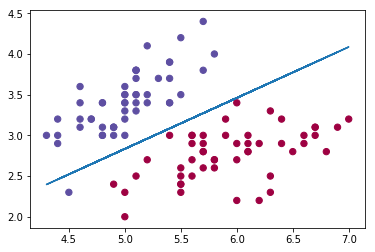

Cost after iteration 71000: 0.049829
Cost after iteration 71100: 0.049812
Cost after iteration 71200: 0.049794
Cost after iteration 71300: 0.049776
Cost after iteration 71400: 0.049758
Cost after iteration 71500: 0.049741
Cost after iteration 71600: 0.049723
Cost after iteration 71700: 0.049705
Cost after iteration 71800: 0.049688
Cost after iteration 71900: 0.049670


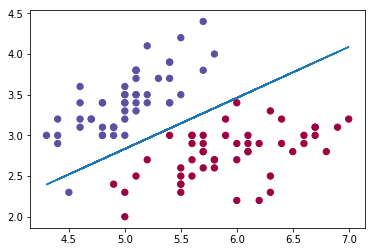

Cost after iteration 72000: 0.049653
Cost after iteration 72100: 0.049635
Cost after iteration 72200: 0.049618
Cost after iteration 72300: 0.049600
Cost after iteration 72400: 0.049583
Cost after iteration 72500: 0.049566
Cost after iteration 72600: 0.049548
Cost after iteration 72700: 0.049531
Cost after iteration 72800: 0.049514
Cost after iteration 72900: 0.049497


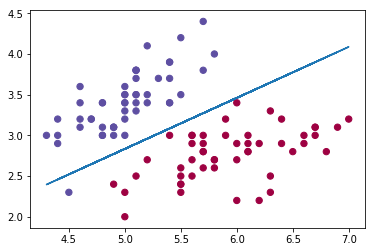

Cost after iteration 73000: 0.049480
Cost after iteration 73100: 0.049462
Cost after iteration 73200: 0.049445
Cost after iteration 73300: 0.049428
Cost after iteration 73400: 0.049411
Cost after iteration 73500: 0.049394
Cost after iteration 73600: 0.049377
Cost after iteration 73700: 0.049360
Cost after iteration 73800: 0.049344
Cost after iteration 73900: 0.049327


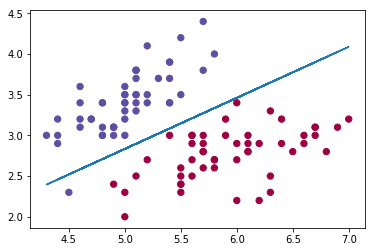

Cost after iteration 74000: 0.049310
Cost after iteration 74100: 0.049293
Cost after iteration 74200: 0.049276
Cost after iteration 74300: 0.049260
Cost after iteration 74400: 0.049243
Cost after iteration 74500: 0.049226
Cost after iteration 74600: 0.049210
Cost after iteration 74700: 0.049193
Cost after iteration 74800: 0.049176
Cost after iteration 74900: 0.049160


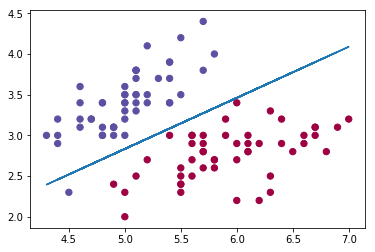

Cost after iteration 75000: 0.049143
Cost after iteration 75100: 0.049127
Cost after iteration 75200: 0.049111
Cost after iteration 75300: 0.049094
Cost after iteration 75400: 0.049078
Cost after iteration 75500: 0.049061
Cost after iteration 75600: 0.049045
Cost after iteration 75700: 0.049029
Cost after iteration 75800: 0.049013
Cost after iteration 75900: 0.048996


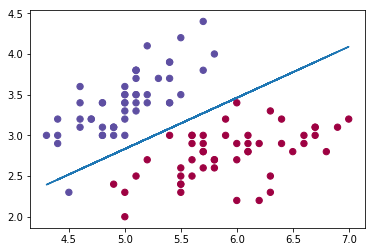

Cost after iteration 76000: 0.048980
Cost after iteration 76100: 0.048964
Cost after iteration 76200: 0.048948
Cost after iteration 76300: 0.048932
Cost after iteration 76400: 0.048916
Cost after iteration 76500: 0.048900
Cost after iteration 76600: 0.048884
Cost after iteration 76700: 0.048868
Cost after iteration 76800: 0.048852
Cost after iteration 76900: 0.048836


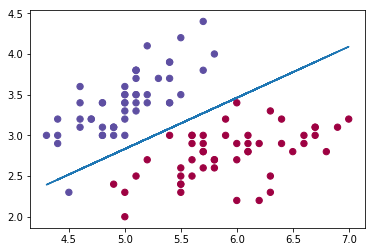

Cost after iteration 77000: 0.048820
Cost after iteration 77100: 0.048804
Cost after iteration 77200: 0.048788
Cost after iteration 77300: 0.048772
Cost after iteration 77400: 0.048757
Cost after iteration 77500: 0.048741
Cost after iteration 77600: 0.048725
Cost after iteration 77700: 0.048710
Cost after iteration 77800: 0.048694
Cost after iteration 77900: 0.048678


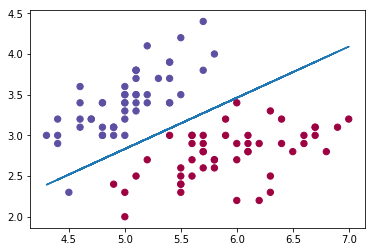

Cost after iteration 78000: 0.048663
Cost after iteration 78100: 0.048647
Cost after iteration 78200: 0.048632
Cost after iteration 78300: 0.048616
Cost after iteration 78400: 0.048601
Cost after iteration 78500: 0.048585
Cost after iteration 78600: 0.048570
Cost after iteration 78700: 0.048554
Cost after iteration 78800: 0.048539
Cost after iteration 78900: 0.048524


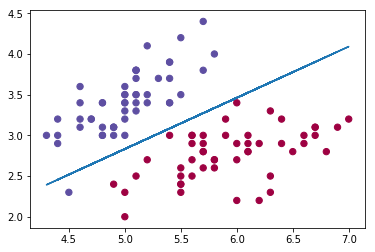

Cost after iteration 79000: 0.048508
Cost after iteration 79100: 0.048493
Cost after iteration 79200: 0.048478
Cost after iteration 79300: 0.048462
Cost after iteration 79400: 0.048447
Cost after iteration 79500: 0.048432
Cost after iteration 79600: 0.048417
Cost after iteration 79700: 0.048402
Cost after iteration 79800: 0.048387
Cost after iteration 79900: 0.048372


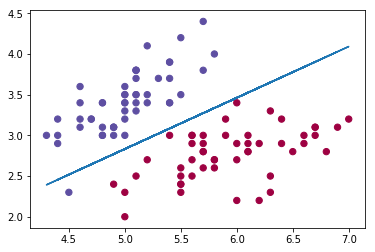

Cost after iteration 80000: 0.048357
Cost after iteration 80100: 0.048342
Cost after iteration 80200: 0.048327
Cost after iteration 80300: 0.048312
Cost after iteration 80400: 0.048297
Cost after iteration 80500: 0.048282
Cost after iteration 80600: 0.048267
Cost after iteration 80700: 0.048252
Cost after iteration 80800: 0.048237
Cost after iteration 80900: 0.048222


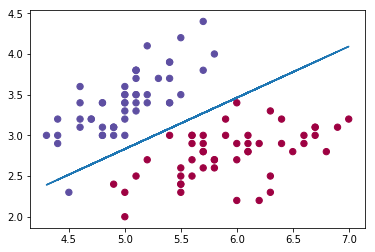

Cost after iteration 81000: 0.048207
Cost after iteration 81100: 0.048193
Cost after iteration 81200: 0.048178
Cost after iteration 81300: 0.048163
Cost after iteration 81400: 0.048149
Cost after iteration 81500: 0.048134
Cost after iteration 81600: 0.048119
Cost after iteration 81700: 0.048105
Cost after iteration 81800: 0.048090
Cost after iteration 81900: 0.048075


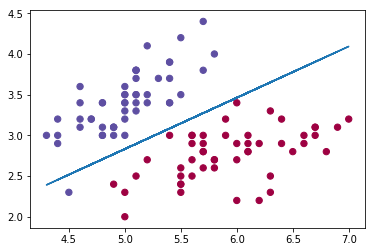

Cost after iteration 82000: 0.048061
Cost after iteration 82100: 0.048046
Cost after iteration 82200: 0.048032
Cost after iteration 82300: 0.048017
Cost after iteration 82400: 0.048003
Cost after iteration 82500: 0.047989
Cost after iteration 82600: 0.047974
Cost after iteration 82700: 0.047960
Cost after iteration 82800: 0.047945
Cost after iteration 82900: 0.047931


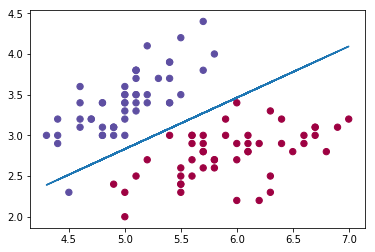

Cost after iteration 83000: 0.047917
Cost after iteration 83100: 0.047903
Cost after iteration 83200: 0.047888
Cost after iteration 83300: 0.047874
Cost after iteration 83400: 0.047860
Cost after iteration 83500: 0.047846
Cost after iteration 83600: 0.047832
Cost after iteration 83700: 0.047817
Cost after iteration 83800: 0.047803
Cost after iteration 83900: 0.047789


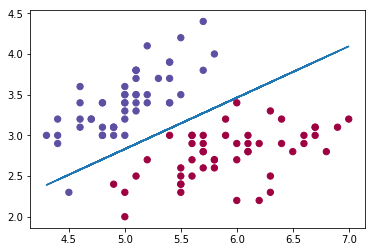

Cost after iteration 84000: 0.047775
Cost after iteration 84100: 0.047761
Cost after iteration 84200: 0.047747
Cost after iteration 84300: 0.047733
Cost after iteration 84400: 0.047719
Cost after iteration 84500: 0.047705
Cost after iteration 84600: 0.047691
Cost after iteration 84700: 0.047677
Cost after iteration 84800: 0.047663
Cost after iteration 84900: 0.047650


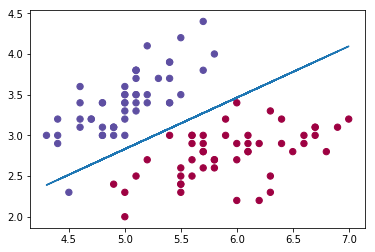

Cost after iteration 85000: 0.047636
Cost after iteration 85100: 0.047622
Cost after iteration 85200: 0.047608
Cost after iteration 85300: 0.047594
Cost after iteration 85400: 0.047581
Cost after iteration 85500: 0.047567
Cost after iteration 85600: 0.047553
Cost after iteration 85700: 0.047539
Cost after iteration 85800: 0.047526
Cost after iteration 85900: 0.047512


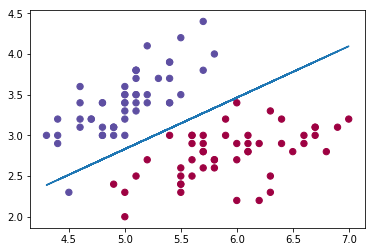

Cost after iteration 86000: 0.047498
Cost after iteration 86100: 0.047485
Cost after iteration 86200: 0.047471
Cost after iteration 86300: 0.047458
Cost after iteration 86400: 0.047444
Cost after iteration 86500: 0.047431
Cost after iteration 86600: 0.047417
Cost after iteration 86700: 0.047404
Cost after iteration 86800: 0.047390
Cost after iteration 86900: 0.047377


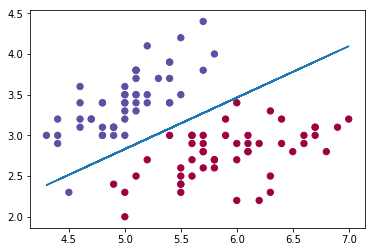

Cost after iteration 87000: 0.047363
Cost after iteration 87100: 0.047350
Cost after iteration 87200: 0.047337
Cost after iteration 87300: 0.047323
Cost after iteration 87400: 0.047310
Cost after iteration 87500: 0.047297
Cost after iteration 87600: 0.047283
Cost after iteration 87700: 0.047270
Cost after iteration 87800: 0.047257
Cost after iteration 87900: 0.047244


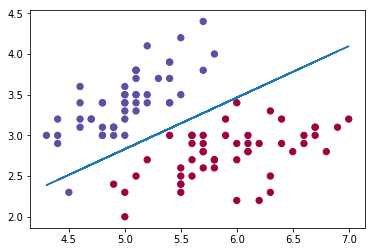

Cost after iteration 88000: 0.047230
Cost after iteration 88100: 0.047217
Cost after iteration 88200: 0.047204
Cost after iteration 88300: 0.047191
Cost after iteration 88400: 0.047178
Cost after iteration 88500: 0.047165
Cost after iteration 88600: 0.047152
Cost after iteration 88700: 0.047138
Cost after iteration 88800: 0.047125
Cost after iteration 88900: 0.047112


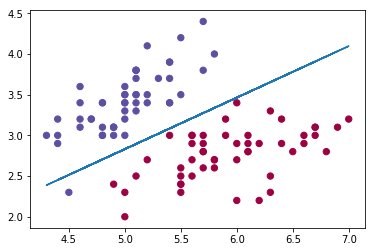

Cost after iteration 89000: 0.047099
Cost after iteration 89100: 0.047086
Cost after iteration 89200: 0.047073
Cost after iteration 89300: 0.047060
Cost after iteration 89400: 0.047048
Cost after iteration 89500: 0.047035
Cost after iteration 89600: 0.047022
Cost after iteration 89700: 0.047009
Cost after iteration 89800: 0.046996
Cost after iteration 89900: 0.046983


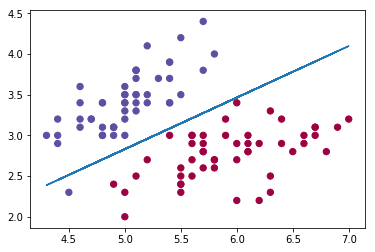

Cost after iteration 90000: 0.046970
Cost after iteration 90100: 0.046958
Cost after iteration 90200: 0.046945
Cost after iteration 90300: 0.046932
Cost after iteration 90400: 0.046919
Cost after iteration 90500: 0.046907
Cost after iteration 90600: 0.046894
Cost after iteration 90700: 0.046881
Cost after iteration 90800: 0.046868
Cost after iteration 90900: 0.046856


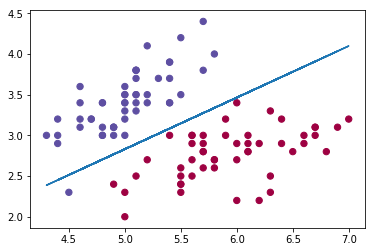

Cost after iteration 91000: 0.046843
Cost after iteration 91100: 0.046831
Cost after iteration 91200: 0.046818
Cost after iteration 91300: 0.046805
Cost after iteration 91400: 0.046793
Cost after iteration 91500: 0.046780
Cost after iteration 91600: 0.046768
Cost after iteration 91700: 0.046755
Cost after iteration 91800: 0.046743
Cost after iteration 91900: 0.046730


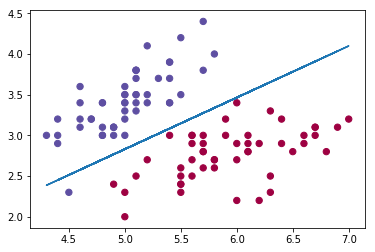

Cost after iteration 92000: 0.046718
Cost after iteration 92100: 0.046705
Cost after iteration 92200: 0.046693
Cost after iteration 92300: 0.046681
Cost after iteration 92400: 0.046668
Cost after iteration 92500: 0.046656
Cost after iteration 92600: 0.046643
Cost after iteration 92700: 0.046631
Cost after iteration 92800: 0.046619
Cost after iteration 92900: 0.046606


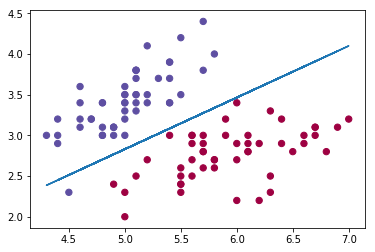

Cost after iteration 93000: 0.046594
Cost after iteration 93100: 0.046582
Cost after iteration 93200: 0.046570
Cost after iteration 93300: 0.046557
Cost after iteration 93400: 0.046545
Cost after iteration 93500: 0.046533
Cost after iteration 93600: 0.046521
Cost after iteration 93700: 0.046509
Cost after iteration 93800: 0.046497
Cost after iteration 93900: 0.046484


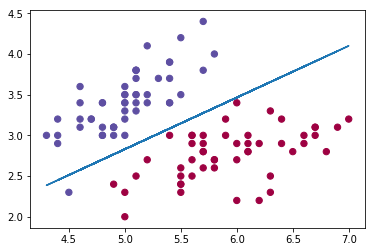

Cost after iteration 94000: 0.046472
Cost after iteration 94100: 0.046460
Cost after iteration 94200: 0.046448
Cost after iteration 94300: 0.046436
Cost after iteration 94400: 0.046424
Cost after iteration 94500: 0.046412
Cost after iteration 94600: 0.046400
Cost after iteration 94700: 0.046388
Cost after iteration 94800: 0.046376
Cost after iteration 94900: 0.046364


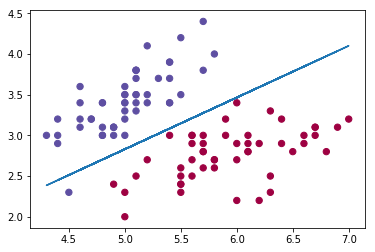

Cost after iteration 95000: 0.046352
Cost after iteration 95100: 0.046340
Cost after iteration 95200: 0.046328
Cost after iteration 95300: 0.046316
Cost after iteration 95400: 0.046304
Cost after iteration 95500: 0.046293
Cost after iteration 95600: 0.046281
Cost after iteration 95700: 0.046269
Cost after iteration 95800: 0.046257
Cost after iteration 95900: 0.046245


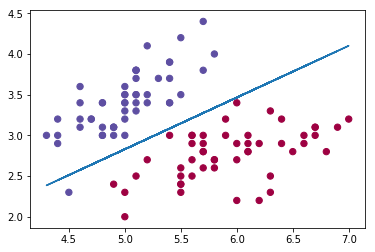

Cost after iteration 96000: 0.046233
Cost after iteration 96100: 0.046222
Cost after iteration 96200: 0.046210
Cost after iteration 96300: 0.046198
Cost after iteration 96400: 0.046186
Cost after iteration 96500: 0.046175
Cost after iteration 96600: 0.046163
Cost after iteration 96700: 0.046151
Cost after iteration 96800: 0.046140
Cost after iteration 96900: 0.046128


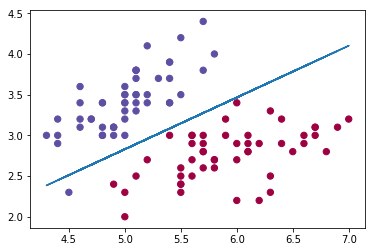

Cost after iteration 97000: 0.046116
Cost after iteration 97100: 0.046105
Cost after iteration 97200: 0.046093
Cost after iteration 97300: 0.046082
Cost after iteration 97400: 0.046070
Cost after iteration 97500: 0.046058
Cost after iteration 97600: 0.046047
Cost after iteration 97700: 0.046035
Cost after iteration 97800: 0.046024
Cost after iteration 97900: 0.046012


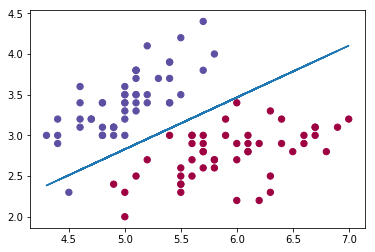

Cost after iteration 98000: 0.046001
Cost after iteration 98100: 0.045989
Cost after iteration 98200: 0.045978
Cost after iteration 98300: 0.045966
Cost after iteration 98400: 0.045955
Cost after iteration 98500: 0.045944
Cost after iteration 98600: 0.045932
Cost after iteration 98700: 0.045921
Cost after iteration 98800: 0.045909
Cost after iteration 98900: 0.045898


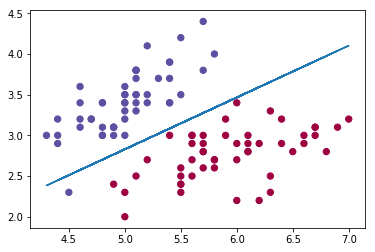

Cost after iteration 99000: 0.045887
Cost after iteration 99100: 0.045875
Cost after iteration 99200: 0.045864
Cost after iteration 99300: 0.045853
Cost after iteration 99400: 0.045842
Cost after iteration 99500: 0.045830
Cost after iteration 99600: 0.045819
Cost after iteration 99700: 0.045808
Cost after iteration 99800: 0.045797
Cost after iteration 99900: 0.045785


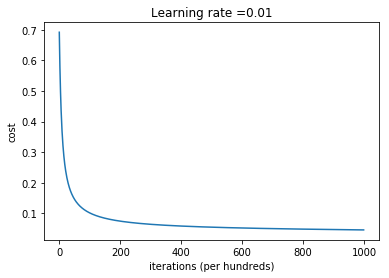

train accuracy: 99.0 %


In [37]:
d = model(X, Y,False, num_iterations = 100000, learning_rate = 0.01, print_cost = True)

In [31]:
w = d['w']
b = d['b']
print("w= " + str(w))
print("b= " + str(b))

w= [[-3.04714588]
 [ 5.10927801]]
b= 0.7089356650397878


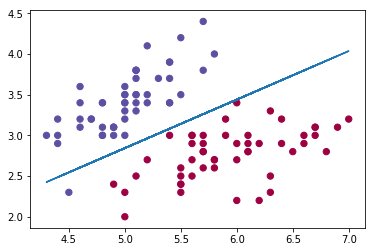

In [32]:
#Plotting
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);
plot_x = X[0,:]
plot_y = -(X[0,:]*w[0][0] + b)/w[1][0]
plt.plot(plot_x, plot_y)
plt.show()

### 4.5 Performance on other datasets

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.625411
Cost after iteration 200: 0.572182
Cost after iteration 300: 0.529903
Cost after iteration 400: 0.495847
Cost after iteration 500: 0.468003
Cost after iteration 600: 0.444900
Cost after iteration 700: 0.425467
Cost after iteration 800: 0.408916
Cost after iteration 900: 0.394658
Cost after iteration 1000: 0.382251
Cost after iteration 1100: 0.371357
Cost after iteration 1200: 0.361713
Cost after iteration 1300: 0.353113
Cost after iteration 1400: 0.345395
Cost after iteration 1500: 0.338427
Cost after iteration 1600: 0.332102
Cost after iteration 1700: 0.326334
Cost after iteration 1800: 0.321050
Cost after iteration 1900: 0.316190


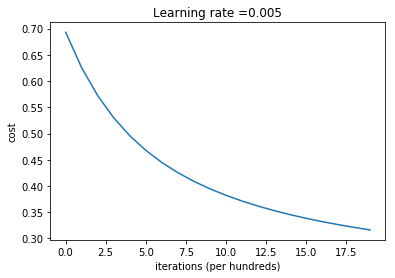

train accuracy: 89.0 %
[[1.2737915 ]
 [1.16518666]] 0.46829334898206904


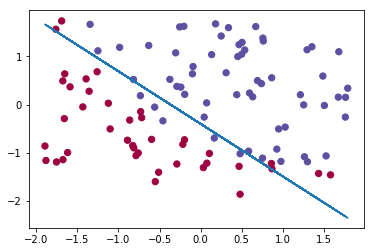

In [14]:
X_, Y_ = load_dataset('dataset2.csv')
X_ = (X_ - np.mean(X_))/ np.std(X_) #normalizing

d_ = model(X_, Y_, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
w = d_['w']
b = d_['b']
print(w, b)
plt.scatter(X_[0, :], X_[1, :], c=Y_.ravel(), s=40, cmap=plt.cm.Spectral);
plot_x = X_[0,:]
plot_y = -(X_[0,:]*w[0][0] + b)/w[1][0]
plt.plot(plot_x, plot_y);

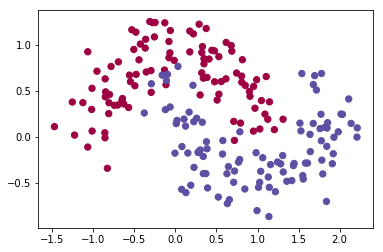

In [38]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

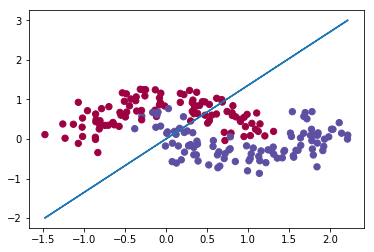

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690385
Cost after iteration 200: 0.687657
Cost after iteration 300: 0.684961
Cost after iteration 400: 0.682297
Cost after iteration 500: 0.679666
Cost after iteration 600: 0.677065
Cost after iteration 700: 0.674495
Cost after iteration 800: 0.671956
Cost after iteration 900: 0.669447


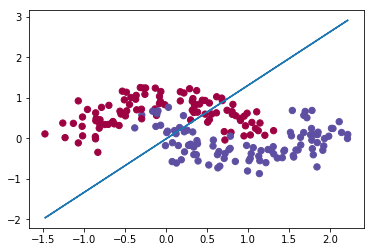

Cost after iteration 1000: 0.666967
Cost after iteration 1100: 0.664516
Cost after iteration 1200: 0.662094
Cost after iteration 1300: 0.659700
Cost after iteration 1400: 0.657333
Cost after iteration 1500: 0.654994
Cost after iteration 1600: 0.652682
Cost after iteration 1700: 0.650397
Cost after iteration 1800: 0.648138
Cost after iteration 1900: 0.645904


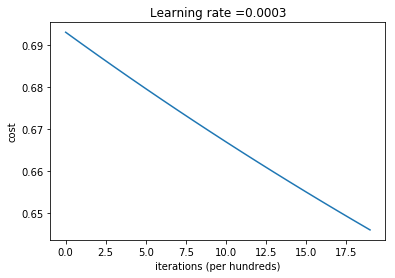

train accuracy: 80.5 %


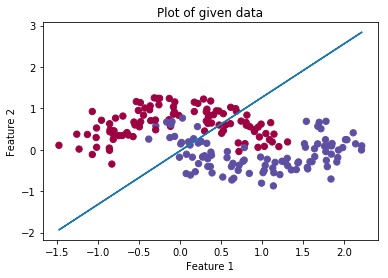

In [39]:
d = model(X, Y, num_iterations = 2000, learning_rate = 0.0003, print_cost = True)
w = d['w']
b = d['b']
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);
plot_x = X[0,:]
plot_y = -(X[0,:]*w[0][0] + b)/w[1][0]
plt.plot(plot_x, plot_y);
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data')
plt.show()